<a href="https://colab.research.google.com/github/milap-mx/Java-Spring-Boot-Business-Components/blob/main/ChurnPrediction(TelecomData).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

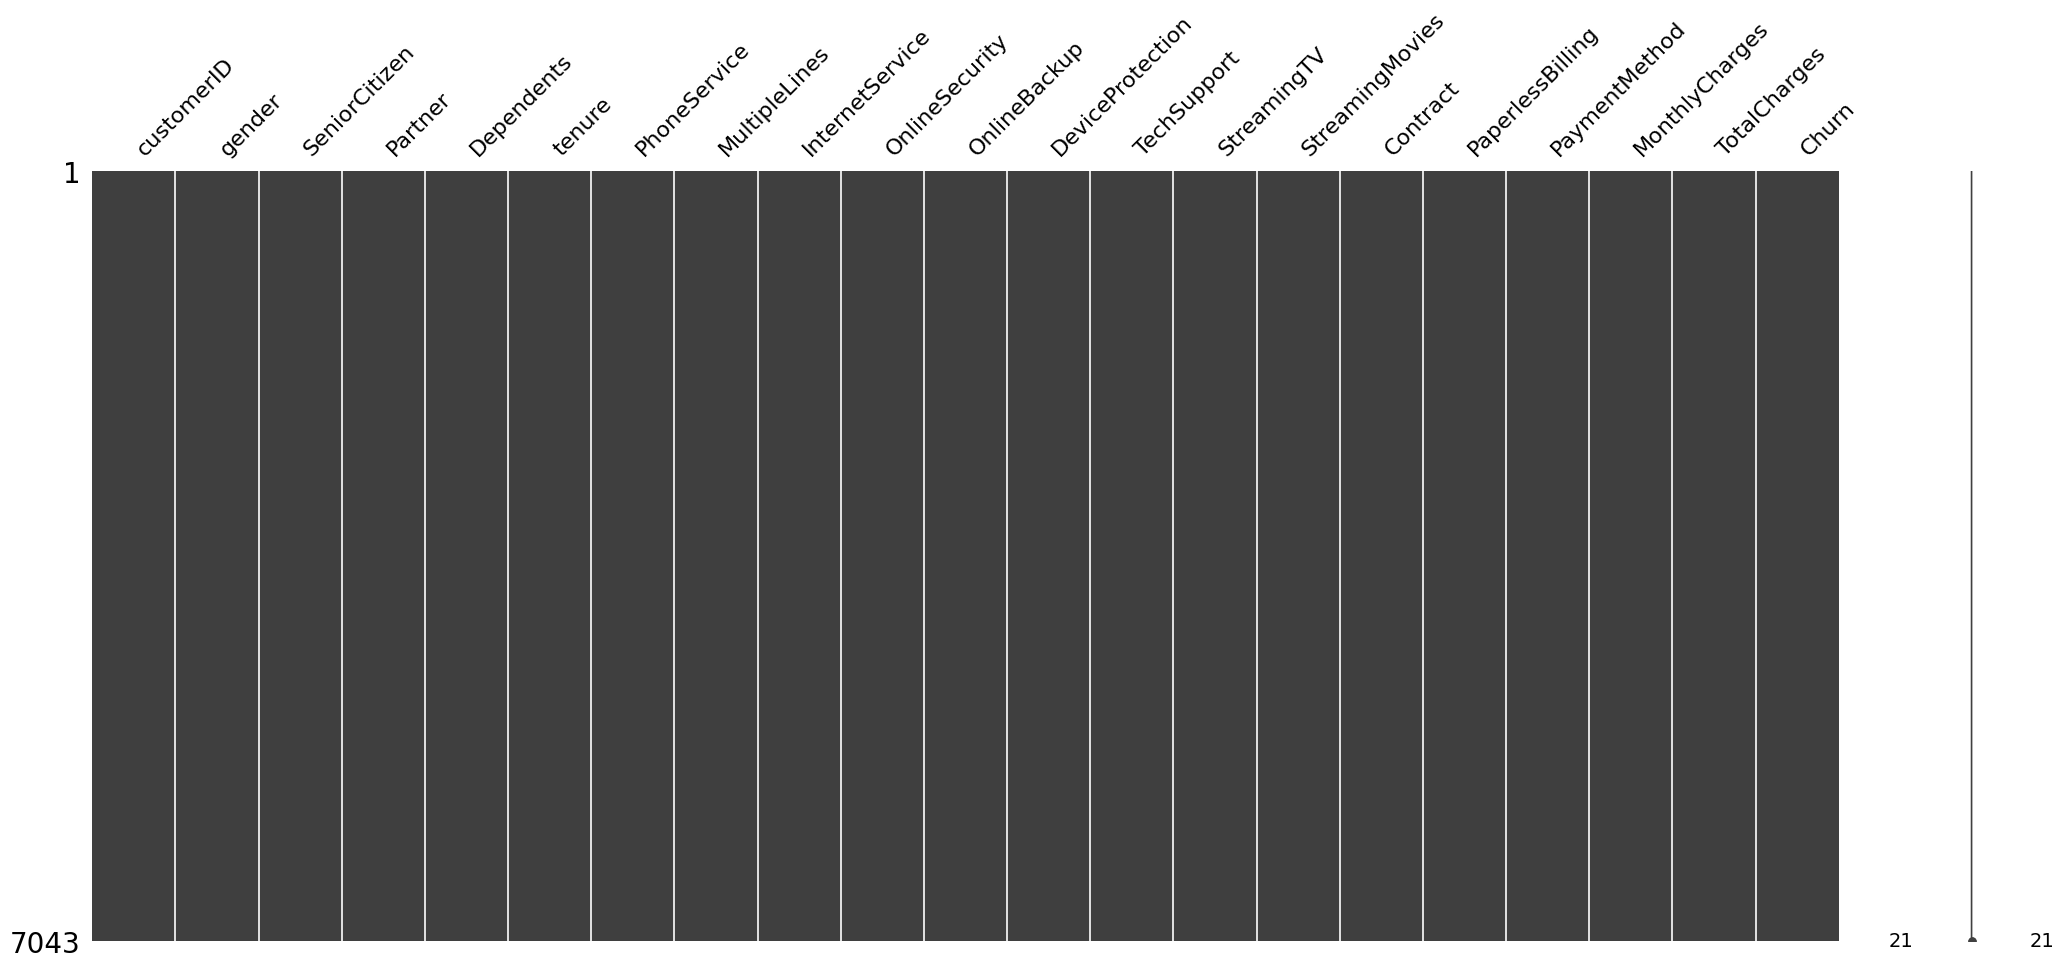

In [ ]:
msno.matrix(df);

In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df.MonthlyCharges, errors='coerce')

df.isnull().sum()


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
df[df['tenure'] == 0].index


Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [ ]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)


In [ ]:
df["InternetService"].describe(include=['object', 'bool'])


count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()


gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()


gender
Female    939
Male      930
Name: Churn, dtype: int64

In [ ]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="InternetService", title="<b> Internet Service distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(df, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

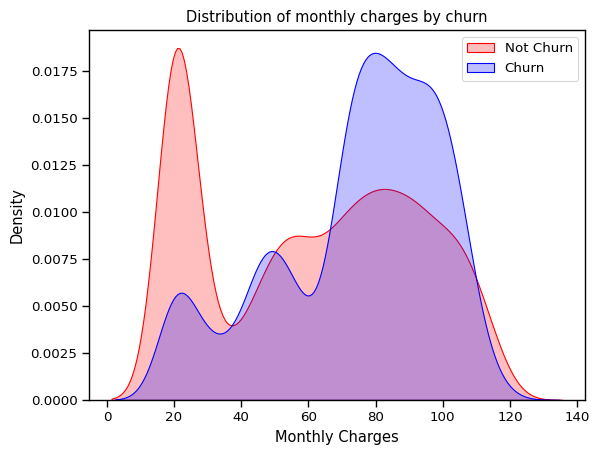

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

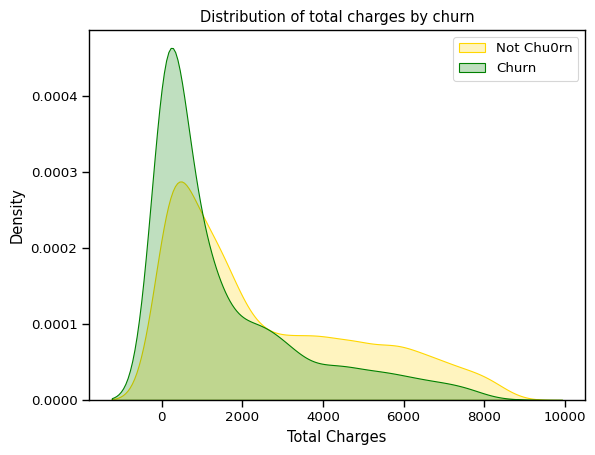

In [ ]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [ ]:
fig = px.box(df, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()

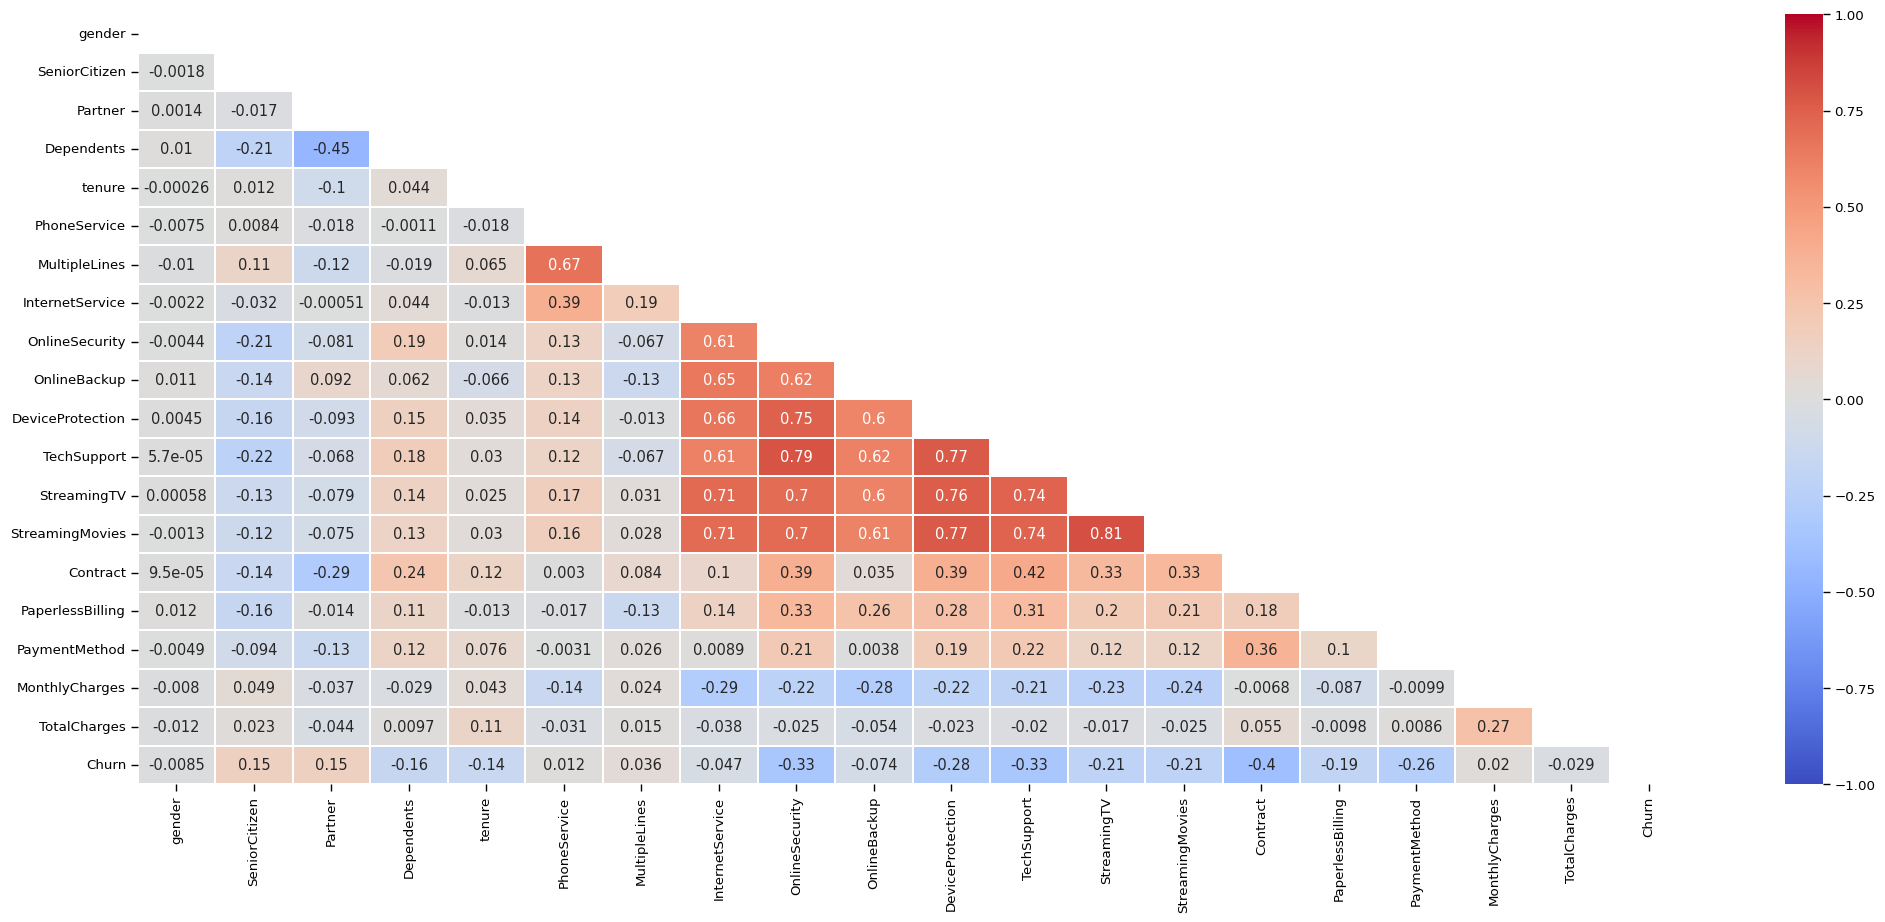

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
df.corr()['Churn']


gender             -0.008545
SeniorCitizen       0.150541
Partner            -0.149982
Dependents         -0.163128
tenure             -0.354049
PhoneService        0.011691
MultipleLines       0.038043
InternetService    -0.047097
OnlineSecurity     -0.289050
OnlineBackup       -0.195290
DeviceProtection   -0.177883
TechSupport        -0.282232
StreamingTV        -0.036303
StreamingMovies    -0.038802
Contract           -0.396150
PaperlessBilling    0.191454
PaymentMethod       0.107852
MonthlyCharges      0.192858
TotalCharges       -0.199484
Churn               1.000000
Name: Churn, dtype: float64

In [ ]:
df["InternetService"].unique()


array([0, 1, 2])

In [ ]:
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

Series([], dtype: int64)

In [ ]:
df[df["gender"]==""][["InternetService", "Churn"]].value_counts()

Series([], dtype: int64)

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X.shape

(7032, 19)

In [ ]:
np.unique(y)

array([0, 1])

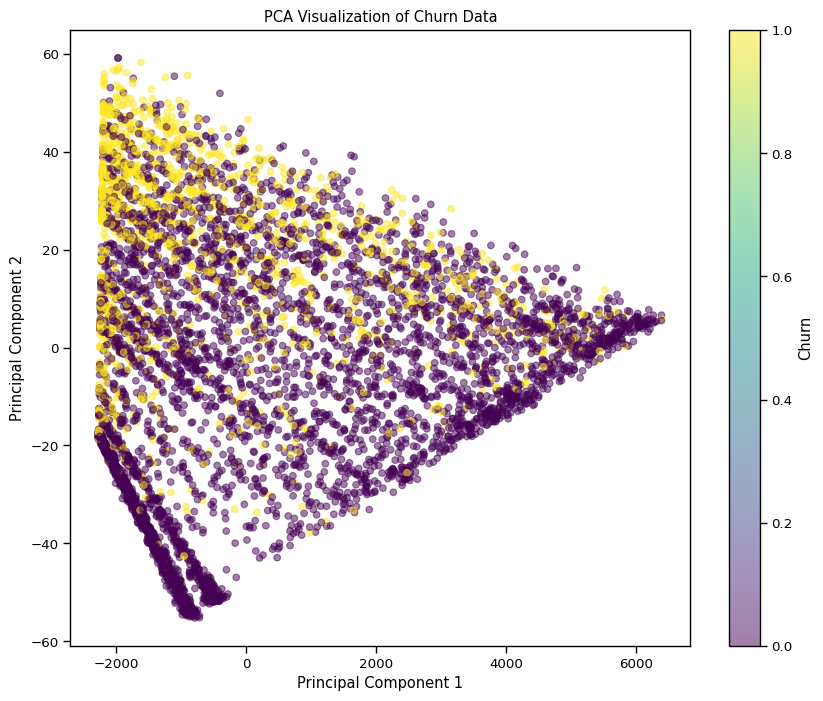

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced = pca.fit_transform(X2)

# Assuming y is your target variable
df_visualize = pd.DataFrame({'PC1': reduced[:, 0], 'PC2': reduced[:, 1], 'Churn': y})

# Plotting the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_visualize['PC1'], df_visualize['PC2'], c=df_visualize['Churn'], cmap='viridis', alpha=0.5)

# Adding colorbar
plt.colorbar(scatter, label='Churn')

# Adding labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Churn Data')

# Show the plot
plt.show()

In [ ]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X2)

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9999824182891569


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reduced, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
X_train_scaled.shape

(5625, 2)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 21)
knn_model.fit(X_train_scaled,y_train)
predicted_y = knn_model.predict(X_test_scaled)
accuracy_knn = knn_model.score(X_test_scaled,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7746979388770433


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 19)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7889125799573561


In [ ]:
Accuracy = np.mean( predicted_y == y_test) * 100
print("Accuracy : %2.2f" % (Accuracy))

Accuracy : 78.89


In [ ]:
Error_Rate = []

for i in range(1,30):

    knn_opt = KNeighborsClassifier(n_neighbors = i)
    knn_opt.fit(X_train_scaled,y_train)
    y_pred_opt = knn_opt.predict(X_test_scaled)
    Accuracy = np.mean(y_pred_opt == y_test)
    error_rate_value = 1 - Accuracy
    Error_Rate.append(error_rate_value)

Text(0, 0.5, 'Error Rate')

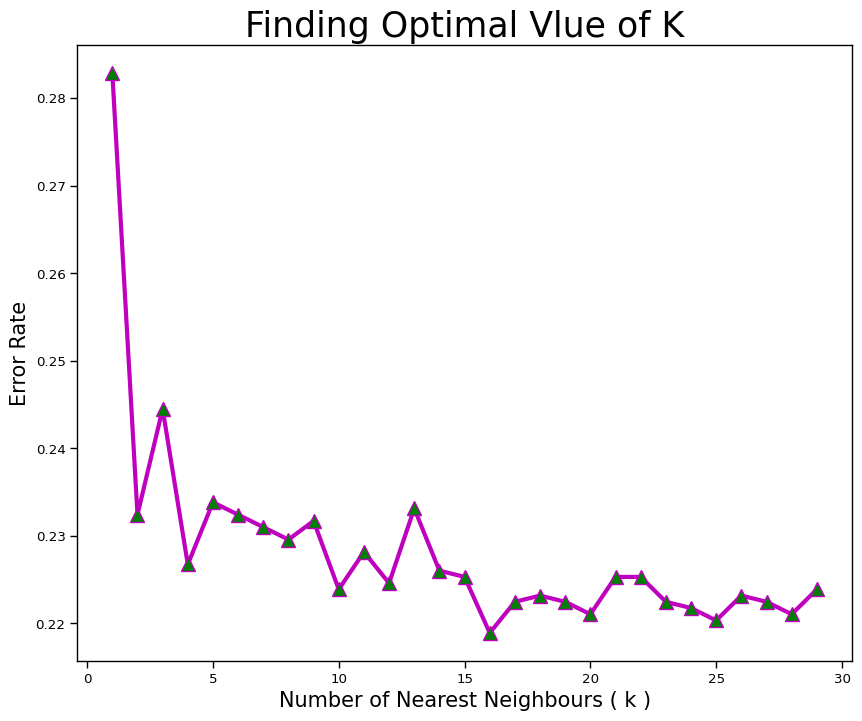

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 30), Error_Rate, 'm', lw = 3,  marker ='^', markerfacecolor ='g', markersize = 10)
plt.title('Finding Optimal Vlue of K', fontsize = 25)
plt.xlabel('Number of Nearest Neighbours ( k )', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

In [ ]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1033
           1       0.67      0.40      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.67      0.68      1407
weighted avg       0.77      0.79      0.77      1407



In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)


Logistic Regression accuracy is : 0.7839374555792467


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

k = 5
cv = KFold(n_splits=k, random_state = 42 , shuffle=True)

# Build multiple logistic regression model
model_cv = LogisticRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X_train, y_train, scoring='accuracy', cv=cv )
np.mean(scores)
print("Avg accuracy : %0.2f" % (np.mean(scores)))

Avg accuracy : 0.79


In [ ]:
y_pred_cv = cross_val_predict(model_cv, X_test, y_test, cv = cv)
y_pred_cv

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Accuracy = np.mean(y_pred_cv == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 78.25


In [ ]:
Metrics_cv = pd.DataFrame({"Accuracy":[accuracy_score(y_test, y_pred_cv, normalize=True)]
,"Precision":[precision_score(y_test, y_pred_cv, average = 'macro')]
,"Recall":[recall_score(y_test, y_pred_cv, average = 'macro')]
,"F1-Score":[f1_score(y_test, y_pred_cv, average = 'macro')]})


In [ ]:
Metrics_cv

,Accuracy,Precision,Recall,F1-Score
0,0.782516,0.724312,0.671079,0.687088


In [ ]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1033
           1       0.64      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.73      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407



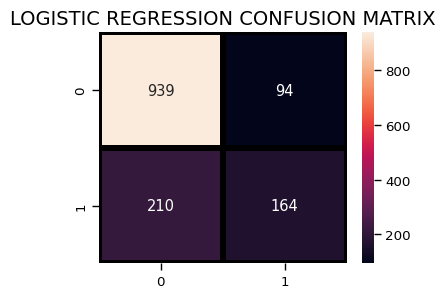

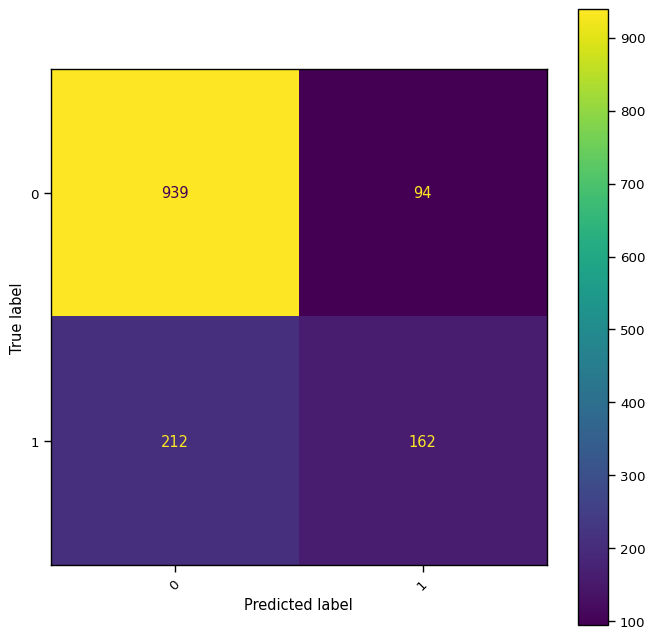

In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()
cm = confusion_matrix(y_test, y_pred_cv)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

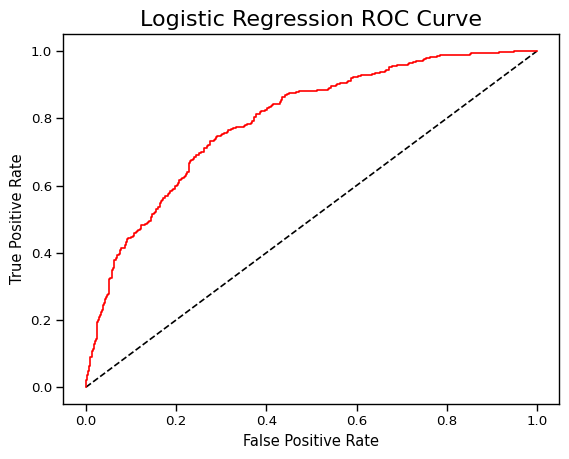

In [ ]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7064676616915423


In [ ]:
pd.DataFrame(index = X.columns, data=dt_model.feature_importances_, columns=['Feature Importance'])

ValueError: ignored

In [ ]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1033
           1       0.45      0.44      0.44       374

    accuracy                           0.71      1407
   macro avg       0.62      0.62      0.62      1407
weighted avg       0.71      0.71      0.71      1407



In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True,bootstrap = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.7853589196872779


In [ ]:
rf = RandomForestClassifier(n_estimators=21,max_features='auto', bootstrap = True, oob_score = True,n_jobs = -1,random_state=50,max_leaf_nodes = 30)
rf.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', max_leaf_nodes=30, n_estimators=21,
                       n_jobs=-1, oob_score=True, random_state=50)

In [ ]:
y_pred_rf= rf.predict(X_test)

In [ ]:
Accuracy = np.mean(y_pred_rf == y_test) * 100
print("Avg accuracy : %2.2f" % (Accuracy))

Avg accuracy : 78.39


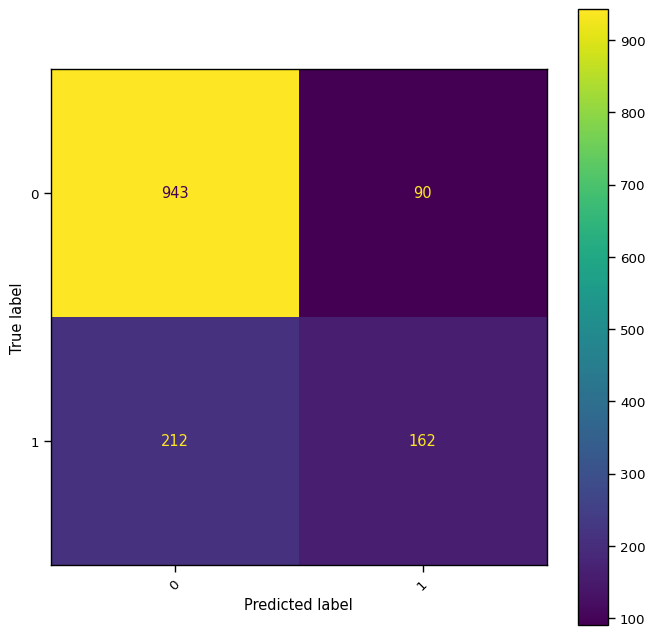

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,prediction_test )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot(xticks_rotation=45)
fig = disp.ax_.get_figure()
fig.set_figwidth(8)
fig.set_figheight(8)
plt.show()

In [ ]:
rf.oob_score_

0.7886222222222222

In [ ]:
out_of_bag_error = 1 - rf.oob_score_
out_of_bag_error

0.21137777777777778

In [ ]:
errors = []

for i in range(1,50):
    rfc = RandomForestClassifier( n_estimators = i, bootstrap=True, max_features = 5)

    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)

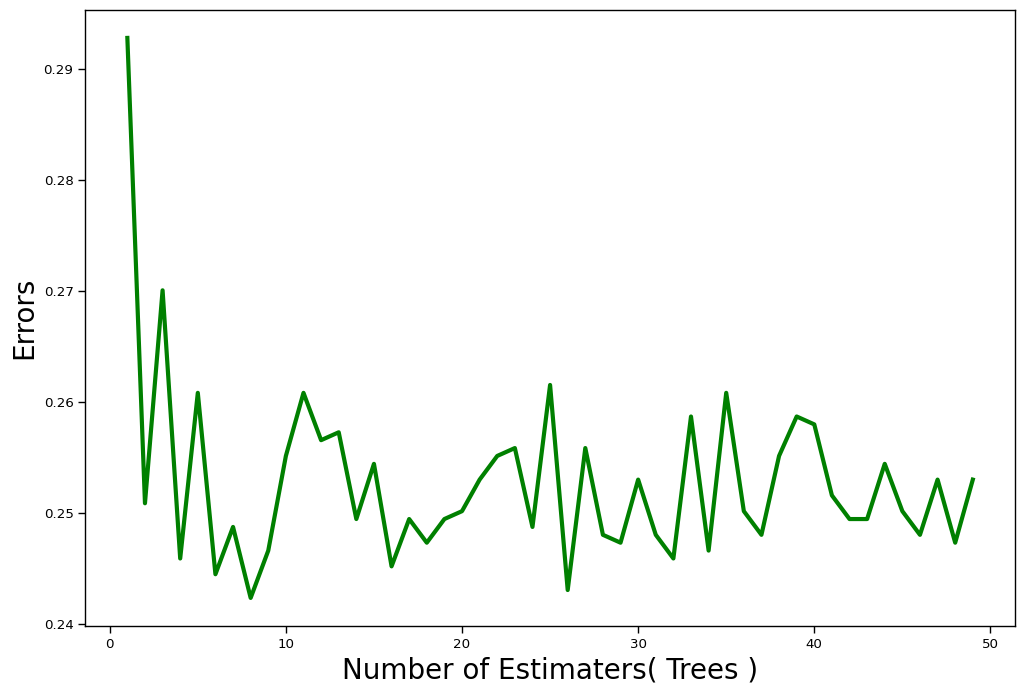

In [ ]:
plt.figure(figsize = (12,8))
plt.plot(range(1,50),errors, 'g', lw = 3)
plt.xlabel('Number of Estimaters( Trees )',fontsize = 20)
plt.ylabel('Errors',fontsize = 20)
plt.show()

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
X2 = df.drop(columns = ['Churn','gender','PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies'])
X2

,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,1,0,1,0,2,0,0,0,1,2,29.85,29.85
1,0,0,0,34,2,0,2,0,1,0,3,56.95,1889.50
2,0,0,0,2,2,2,0,0,0,1,3,53.85,108.15
3,0,0,0,45,2,0,2,2,1,0,0,42.30,1840.75
4,0,0,0,2,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,2,1,1,3,84.80,1990.50
7039,0,1,1,72,0,2,2,0,1,1,1,103.20,7362.90
7040,0,1,1,11,2,0,0,0,0,1,2,29.60,346.45
7041,1,1,0,4,0,0,0,0,0,1,3,74.40,306.60


In [ ]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('rf', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.7761194029850746


In [ ]:
svc_model = SVC(random_state = 42)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7341862117981521


In [ ]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)

AdaBoost Classifier accuracy


0.7768301350390903

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))

Gradient Boosting Classifier 0.7846481876332623


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

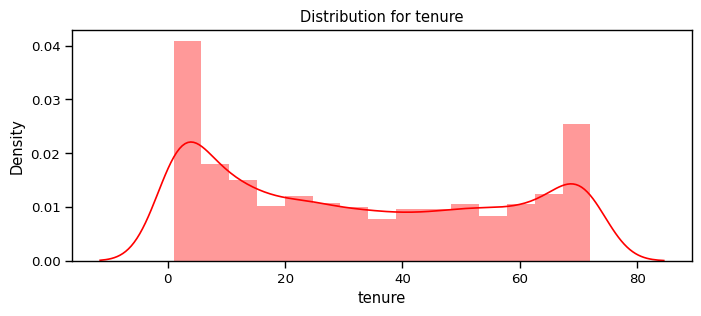

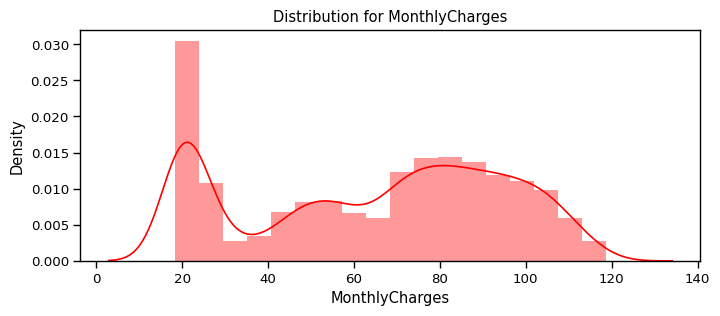

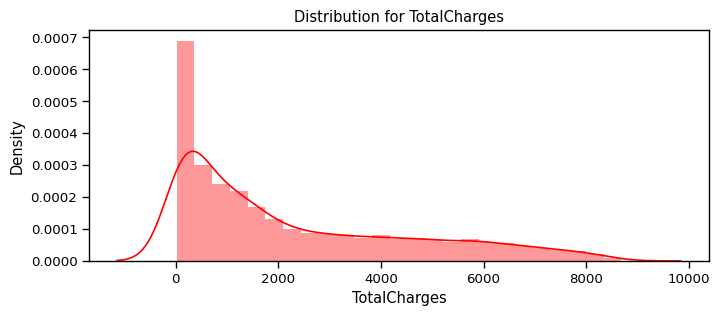

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

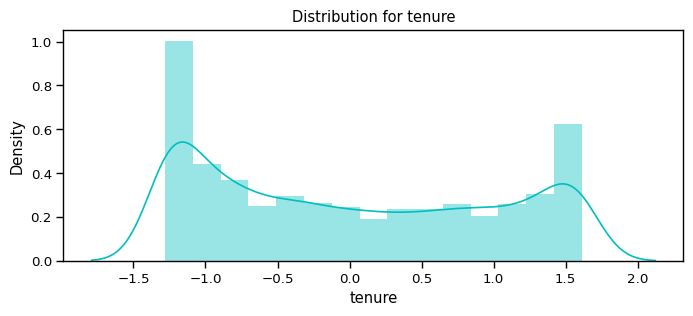

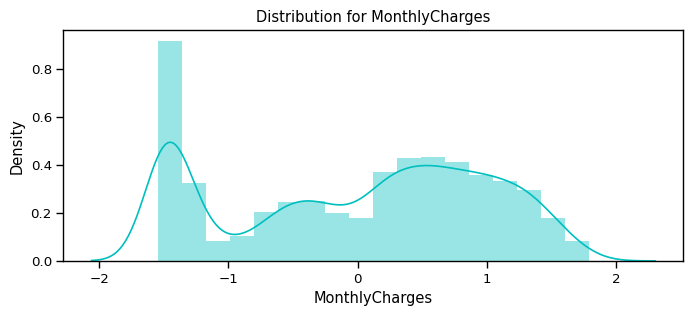

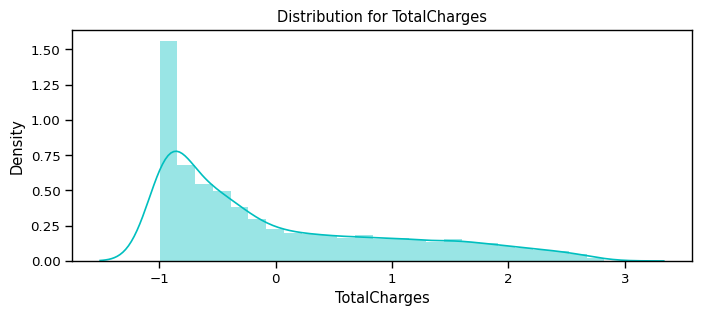

In [ ]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# Divide the columns into 3 categories, one ofor standardisation, one for label encoding and one for one hot encoding

cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # those that need one-hot encoding
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #those that need label encoding

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [ ]:
sample_index = np.random.randint(0, len(X_test))
sample_X = X_test.iloc[sample_index, :].values.reshape(1, -1)
sample_y = y_test[sample_index]

In [ ]:
models = [knn_model,lr_model,dt_model,model_rf,eclf1,a_model,svc_model,gb]

# Test each algorithm on the selected sample
for model in models:
    model_name = type(model).__name__

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the selected sample
    pred = model.predict(sample_X)

    # Evaluate the prediction
    print(f"Model: {model_name}")
    print(f"Predicted class: {pred[0]}")
    print(f"True class: {sample_y}")
    print("=" * 30)

Model: KNeighborsClassifier
Predicted class: 0
True class: 0
Model: LogisticRegression
Predicted class: 0
True class: 0
Model: DecisionTreeClassifier
Predicted class: 0
True class: 0
Model: RandomForestClassifier
Predicted class: 0
True class: 0
Model: VotingClassifier
Predicted class: 0
True class: 0
Model: AdaBoostClassifier
Predicted class: 0
True class: 0
Model: SVC
Predicted class: 0
True class: 0
Model: GradientBoostingClassifier
Predicted class: 0
True class: 0


In [ ]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

ValueError: ignored

<Figure size 400x300 with 0 Axes>

In [ ]:
sample_y = 0
while sample_y != 1:
    sample_index = np.random.randint(0, len(X_test))
    sample_X = X_test.iloc[sample_index, :].values.reshape(1, -1)
    sample_y = y_test[sample_index]
models = [knn_model, lr_model, dt_model, model_rf, eclf1, svc_model, gb, a_model]

for model in models:
    model_name = type(model).__name__

    # Train the model on the entire training set
    model.fit(X_train, y_train)

    # Make predictions on the selected sample
    pred = model.predict(sample_X)

    # Evaluate the prediction
    print(f"Model: {model_name}")
    print(f"Predicted class: {pred[0]}")
    print(f"True class: {sample_y}")
    print("=" * 30)